# YOLO

In [6]:
import os

import torch
import cv2
import numpy as np
from ultralytics import YOLO

import matplotlib.pyplot as plt

In [7]:
classes = ['10C', '10D', '10H', '10S',
            '2C', '2D', '2H', '2S',
            '3C', '3D', '3H', '3S',
            '4C', '4D', '4H', '4S',
            '5C', '5D', '5H', '5S', 
            '6C', '6D', '6H', '6S', 
            '7C', '7D', '7H', '7S', 
            '8C', '8D', '8H', '8S', 
            '9C', '9D', '9H', '9S', 
            'AC', 'AD', 'AH', 'AS', 
            'JC', 'JD', 'JH', 'JS', 
            'KC', 'KD', 'KH', 'KS', 
            'QC', 'QD', 'QH', 'QS']

idx2label = {idx: label for idx, label in enumerate(classes)}
label2idx = {label: idx for idx, label in idx2label.items()}

In [8]:
def plot_images_with_boxes(images_path:str, labels_path:str, n_images:int=9) -> None:

    img_files = os.listdir(images_path)
    sample_imgs = np.random.choice(img_files, n_images)

    fig, axs = plt.subplots(n_images//3, 3, figsize=(10, 16))
    for i, img_file in enumerate(sample_imgs):
        row = i//3
        col = i%3

        img_path = os.path.join(images_path, img_file)
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

        label_path = os.path.join(labels_path, img_file[:-4] + '.txt')
        f = open(label_path, 'r')

        for label in f:
            class_id, x_center, y_center, width, height = map(float, label.split())
            h, w, _ = img.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)
            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(img, idx2label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

        axs[row, col].imshow(img)
        axs[row, col].axis('off')

    plt.show()


In [9]:
train_images_path = '/Users/alessandropranzo/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/1st Year/1st Sem/Image Analysis/Project/shared_data/dataset/train/images'
train_labels_path = '/Users/alessandropranzo/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/1st Year/1st Sem/Image Analysis/Project/shared_data/dataset/train/labels'

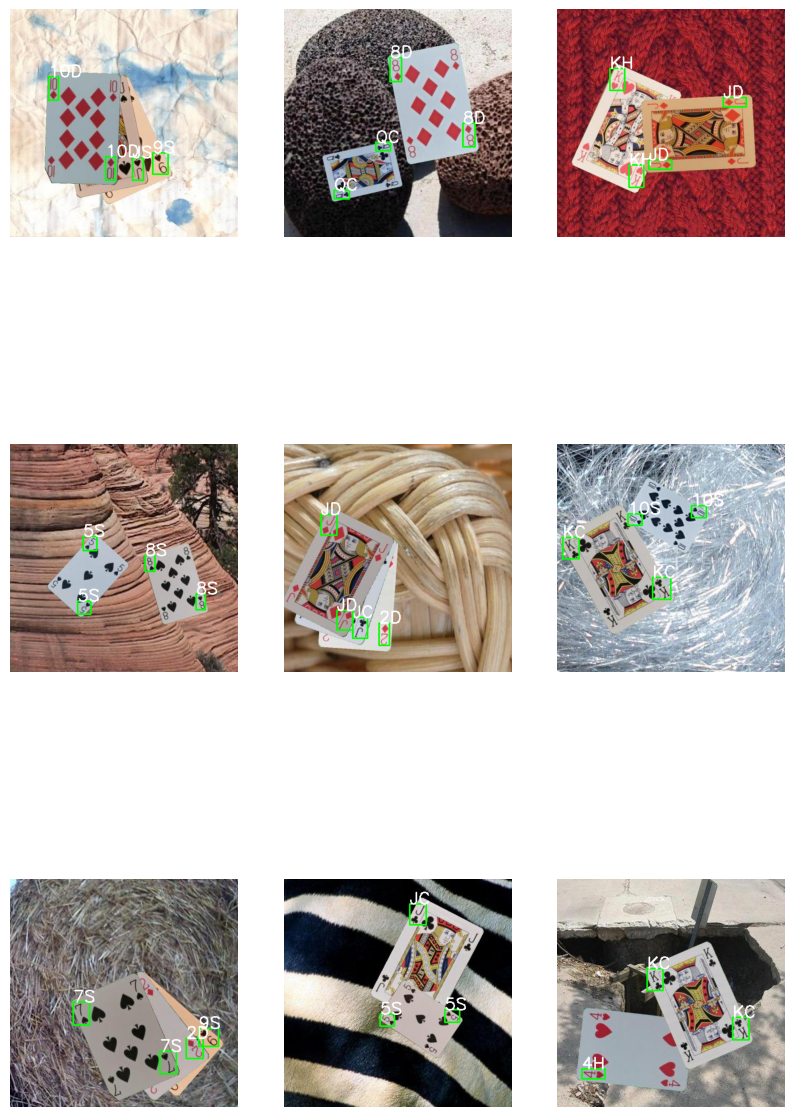

In [10]:
plot_images_with_boxes(train_images_path, train_labels_path)

In [11]:
model = YOLO('yolo11n.pt')

In [ ]:
model.train()